Saving im2.avif to im2.avif


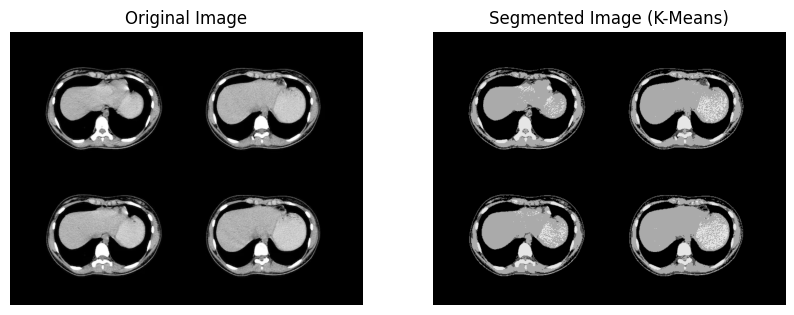

In [1]:
# Install required libraries (only first time)
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image from your computer
uploaded = files.upload()

# Get uploaded file name
image_path = list(uploaded.keys())[0]

# Read image
image = cv2.imread(image_path)

# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape image
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# K-Means criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of clusters
k = 4

# Apply K-Means
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers
centers = np.uint8(centers)

# Reconstruct segmented image
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(image.shape)

# Show results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title("Segmented Image (K-Means)")
plt.axis("off")

plt.show()